In [1]:
import sys
sys.path.append("../")
import numpy as np
import phate
import graphtools as gt
import numpy as np
import pygsp
from src.mds import embed_MDS
import scprep
from scipy.spatial.distance import jensenshannon
from src.embedding import EmbJSD, EmbHeatGeo, EmbOT, EmbGraphMMD, EmbCTD, EmbHyp
import scanpy as sc

import scipy
from src.utils import interpolate
from MultiscaleEMD import DiffusionCheb
from scipy.spatial.distance import pdist, squareform

In [2]:
data, labels = phate.tree.gen_dla(n_branch=3, branch_length=500)
knn=5
anisotropy=0
decay=40

In [3]:
emb_ot_op = EmbOT(knn=knn)
emb_mmd = EmbGraphMMD(knn=knn)

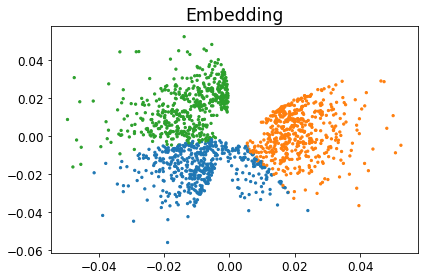

In [4]:
emb_ot_op.scatterplot(data, labels)

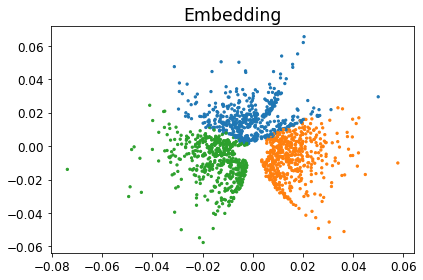

In [5]:
emb_mmd.scatterplot(data, labels)

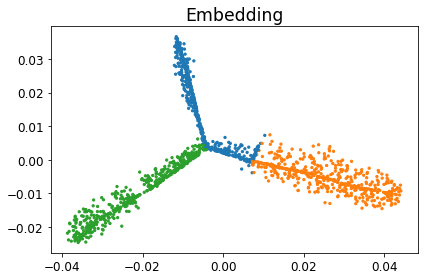

In [3]:
emb_cmt = EmbCTD(knn=knn)
emb_cmt.scatterplot(data,labels)

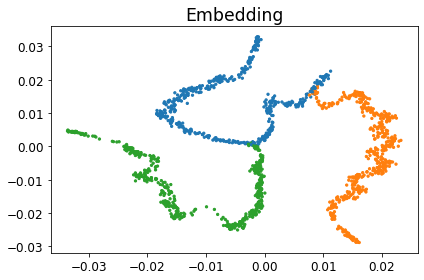

In [7]:
emb_hyp = EmbHyp(knn=10)
emb_hyp.scatterplot(data,labels, tau=50)

In [7]:
pbmc = sc.datasets.pbmc3k_processed()
data = pbmc.X
labels = pbmc.obs["louvain"]

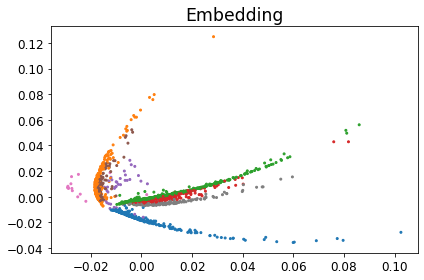

In [6]:
emb_ot_op = EmbOT(knn=knn)
emb_ot_op.scatterplot(data, labels)

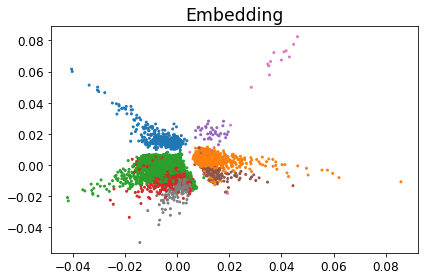

In [8]:
emb_mmd = EmbGraphMMD(knn=knn)
emb_mmd.scatterplot(data, labels)

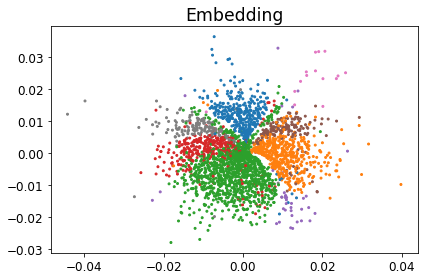

In [9]:
emb_mmd.scatterplot(data, labels, order=10)

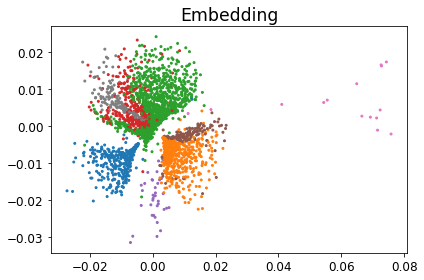

In [17]:
emb_ctd = EmbCTD(knn=2)
emb_ctd.scatterplot(data, labels)

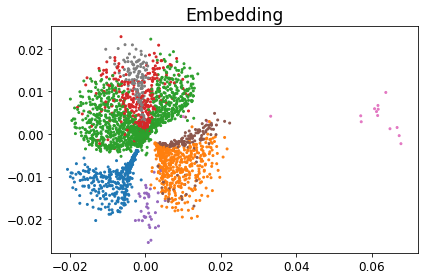

In [18]:
emb_ctd = EmbCTD(knn=5)
emb_ctd.scatterplot(data, labels)

In [19]:
emb, labels = emb_ctd.geodesic_euc(data, [0,], [1300,])

Changed MDS solver to `smacof`, `sge` not implemented for 2<dim.


<AxesSubplot:>

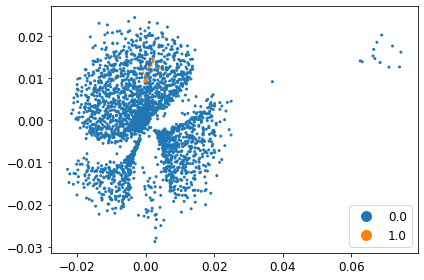

In [39]:
zeros=np.zeros_like(pbmc.obs["louvain"],dtype=float)
scprep.plot.scatter2d(emb, c=np.concatenate((zeros,labels),dtype=float))